# 2.ii.K means Clustering Voronoi plot
## Name : Gobinath Periyasamy
## Roll No : CS21M501

In [111]:
#importing necessary libraries
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sys
from scipy.spatial import Voronoi, voronoi_plot_2d

In [112]:
data = pd.read_csv("Dataset.csv",header = None,prefix= 'Component')

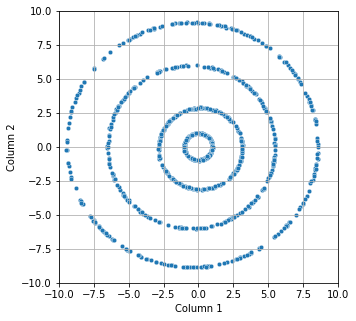

In [113]:
plt.figure(figsize = (5,5))
plt.grid()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
sb.scatterplot(x = data['Component0'], y = data['Component1'], s =20, palette= 'Accent')
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.show()

### Functions for the Clustering

In [143]:
def centroid_initialization(X , n_clusters):
    centroids = np.zeros((n_clusters, n_features))
    #initial assignment (random)
    for i in range(n_clusters):
        centroid_current_cluster = X[np.random.choice(range(n_samples))]
        centroids[i] = centroid_current_cluster

    return centroids

def cluster_assignment(X, centroids , n_clusters):
    current_clusters = [[] for i in range(n_clusters)]

    for index, data_point in enumerate(X):
        nearest_centroid = np.argmin(
            np.sqrt(np.sum((data_point - centroids) ** 2, axis=1))
        )
        current_clusters[nearest_centroid].append(index)

    return current_clusters

def update_centroids(X, current_clusters, n_clusters):
    centroids = np.zeros((n_clusters, n_features))
    for index, cluster in enumerate(current_clusters):
        new_centroid = np.mean(X[cluster], axis=0)
        centroids[index] = new_centroid

    return centroids

def plot( centroids):
    plt.scatter(X[:, 0], X[:, 1], color = 'green', label = 'data')
    plt.scatter(centroids[:-1, 0], centroids[:-1, 1],color = 'black', label = 'previous centroids')
    plt.scatter(centroids[-1, 0], centroids[-1, 1], color = 'red', label = 'next one centroid')
    plt.title('Select % d th centroid'%(centroids.shape[0]))
     
    #plt.legend()
#     plt.xlim(-5, 12)
#     plt.ylim(-10, 15)
    plt.show()
    
    
def distance(p1, p2):
    return np.sum((p1 - p2)**2)


def initialize_kmeans_plus(X, k):
    centroids = []
    centroids.append(X[np.random.choice(range(n_samples))])
    plot(np.array(centroids))
    ## compute remaining k - 1 centroids
    for c_id in range(k - 1):
         
        ## List to store distances of data from the nearest mean
        dist = []
        for i in range(X.shape[0]):
            point = X[i, :]
            d = sys.maxsize
             
            #finding closest centroid for 'point' from so far selected centroids 
            for j in range(len(centroids)):
                temp_dist = distance(point, centroids[j])
                d = min(d, temp_dist)
            dist.append(d)
             
        # select a data point as next centroid with probability proportional to above distance
        dist = np.array(dist)
        p = dist / np.sum(dist)
        index = np.random.choice(range(n_samples), p = p)
        next_centroid = X[index, :]
        #next_centroid = X[np.argmax(dist), :]
        centroids.append(next_centroid)
        dist = []
        plot( np.array(centroids))
    return centroids

def plot( centroids):
    plt.scatter(X[:, 0], X[:, 1], color = 'green', label = 'data')
    plt.scatter(centroids[:-1, 0], centroids[:-1, 1],color = 'black', label = 'previous centroids')
    plt.scatter(centroids[-1, 0], centroids[-1, 1], color = 'red', label = 'next one centroid')
    plt.title('Select % d th centroid'%(centroids.shape[0]))
     
    #plt.legend()
#     plt.xlim(-5, 12)
#     plt.ylim(-10, 15)
    plt.show()
    
def distance(p1, p2):
    return np.sum((p1 - p2)**2)

def initialize_kmeans_plus(X, k):
    centroids = []
    centroids.append(X[np.random.choice(range(n_samples))])
    plot(np.array(centroids))
    ## compute remaining k - 1 centroids
    for c_id in range(k - 1):
         
        ## List to store distances of data from the nearest mean
        dist = []
        for i in range(X.shape[0]):
            point = X[i, :]
            d = sys.maxsize
             
            #finding closest centroid for 'point' from so far selected centroids 
            for j in range(len(centroids)):
                temp_dist = distance(point, centroids[j])
                d = min(d, temp_dist)
            dist.append(d)
             
        # select a data point as next centroid with probability proportional to above distance
        dist = np.array(dist)
        p = dist / np.sum(dist)
        index = np.random.choice(range(n_samples), p = p)
        next_centroid = X[index, :]
        #next_centroid = X[np.argmax(dist), :]
        centroids.append(next_centroid)
        dist = []
        plot( np.array(centroids))
    return centroids

In [144]:
n_clusters_list = [2,3,4,5]
n_features = len(data.columns)
n_samples = len(data)
no_of_ran_init = 5
palette = ["rocket",'icefire','viridis','magma','Accent']

In [145]:
X = data.to_numpy()

K-Means Converged for Cluster 2


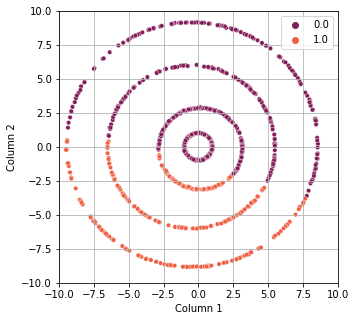

In [146]:
n_clusters = 2
i = 0
n_iter = 1000
centroids = centroid_initialization(X, n_clusters)

for it in range(n_iter):
    clusters = cluster_assignment(X, centroids,n_clusters)
    previous_centroids = centroids.copy()
    centroids = update_centroids(X, clusters,n_clusters)
    diff = centroids - previous_centroids
    if not diff.any():
        print("K-Means Converged for Cluster " + str(n_clusters))
        break
y_pred = np.zeros(n_samples)
for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
        y_pred[index] = cluster_id
#Visualization

plt.figure(figsize = (5,5))
plt.grid()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
sb.scatterplot(x = X[:, 0], y =  X[:, 1], s =20, hue= y_pred, palette=palette[i] )
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.show()
if(len(centroids) > 3):
    print("Voronoi Plot associated to "+ str(n_clusters) +" cluster center")
    vor = Voronoi(centroids)
    voronoi_plot_2d(vor,line_colors = 'red',line_width=2,show_points = True)
    plt.grid()
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    sb.scatterplot(x=X[:, 0], y =X[:, 1], c=y_pred)
    plt.show()


K-Means Converged for Cluster 3


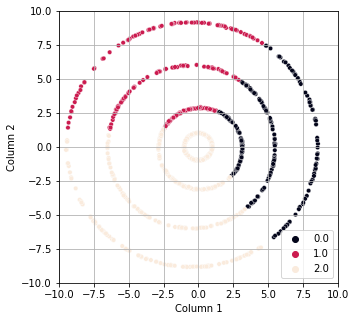

[[ 4.8450875   0.47566064]
 [-1.97565731  5.05792442]
 [-1.26196417 -2.19223711]]


In [147]:
n_clusters = 3
i = 0
n_iter = 1000
centroids = centroid_initialization(X, n_clusters)
for it in range(n_iter):
    clusters = cluster_assignment(X, centroids,n_clusters)
    previous_centroids = centroids.copy()
    centroids = update_centroids(X, clusters,n_clusters)
    diff = centroids - previous_centroids
    if not diff.any():
        print("K-Means Converged for Cluster " + str(n_clusters))
        break
y_pred = np.zeros(n_samples)
for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
        y_pred[index] = cluster_id
#Visualization

plt.figure(figsize = (5,5))
plt.grid()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
sb.scatterplot(x = X[:, 0], y =  X[:, 1], s =20, hue= y_pred, palette=palette[i] )
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.show()
print(centroids)
if(len(centroids) > 3):
    print("Voronoi Plot associated to "+ str(n_clusters) +" cluster center")
    vor = Voronoi(centroids)
    voronoi_plot_2d(vor,line_colors = 'red',line_width=2,show_points = True)
    plt.grid()
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    sb.scatterplot(x=X[:, 0], y =X[:, 1], c=y_pred)
    plt.show()


K-Means Converged for Cluster 4


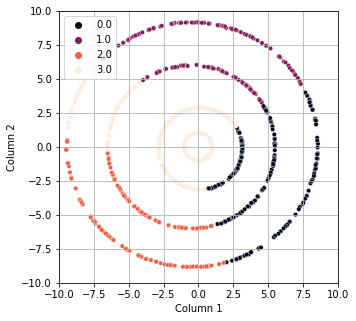

[[ 4.47741638 -1.96172246]
 [ 0.98177795  6.71515918]
 [-4.30818901 -5.47897472]
 [-1.09958805  0.47292005]]
Voronoi Plot associated to 4 cluster center


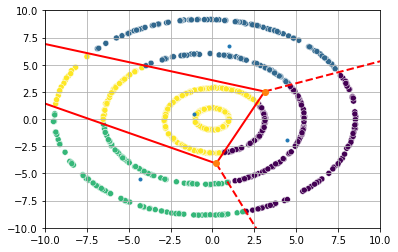

In [148]:
n_clusters = 4
i = 0
n_iter = 1000
centroids = centroid_initialization(X, n_clusters)
for it in range(n_iter):
    clusters = cluster_assignment(X, centroids,n_clusters)
    previous_centroids = centroids.copy()
    centroids = update_centroids(X, clusters,n_clusters)
    diff = centroids - previous_centroids
    if not diff.any():
        print("K-Means Converged for Cluster " + str(n_clusters))
        break
y_pred = np.zeros(n_samples)
for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
        y_pred[index] = cluster_id
#Visualization

plt.figure(figsize = (5,5))
plt.grid()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
sb.scatterplot(x = X[:, 0], y =  X[:, 1], s =20, hue= y_pred, palette=palette[i] )
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.show()
print(centroids)
if(len(centroids) > 3):
    print("Voronoi Plot associated to "+ str(n_clusters) +" cluster center")
    vor = Voronoi(centroids)
    voronoi_plot_2d(vor,line_colors = 'red',line_width=2,show_points = True)
    plt.grid()
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    sb.scatterplot(x=X[:, 0], y =X[:, 1], c=y_pred)
    plt.show()


K-Means Converged for Cluster 5


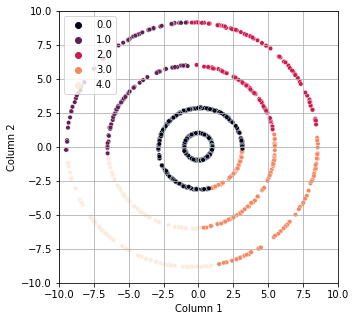

[[-0.20195557  0.15990968]
 [-5.05198272  4.81143115]
 [ 4.07991944  5.35751875]
 [ 4.2501576  -3.37887377]
 [-4.29908404 -5.6759684 ]]
Voronoi Plot associated to 5 cluster center


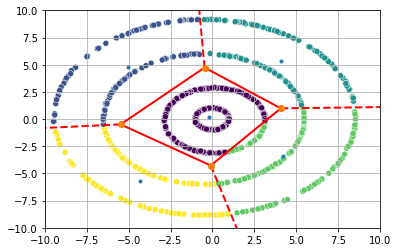

In [149]:
n_clusters = 5
i = 0
n_iter = 1000
centroids = centroid_initialization(X, n_clusters)
for it in range(n_iter):
    clusters = cluster_assignment(X, centroids,n_clusters)
    previous_centroids = centroids.copy()
    centroids = update_centroids(X, clusters,n_clusters)
    diff = centroids - previous_centroids
    if not diff.any():
        print("K-Means Converged for Cluster " + str(n_clusters))
        break
y_pred = np.zeros(n_samples)
for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
        y_pred[index] = cluster_id
#Visualization

plt.figure(figsize = (5,5))
plt.grid()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
sb.scatterplot(x = X[:, 0], y =  X[:, 1], s =20, hue= y_pred, palette=palette[i] )
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.show()
print(centroids)
if(len(centroids) > 3):
    print("Voronoi Plot associated to "+ str(n_clusters) +" cluster center")
    vor = Voronoi(centroids)
    voronoi_plot_2d(vor,line_colors = 'red',line_width=2,show_points = True)
    plt.grid()
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    sb.scatterplot(x=X[:, 0], y =X[:, 1], c=y_pred)
    plt.show()


# K = 2

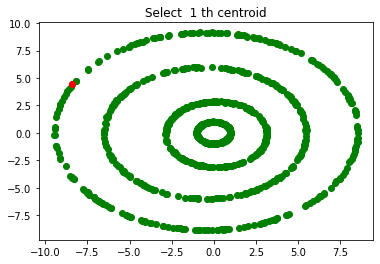

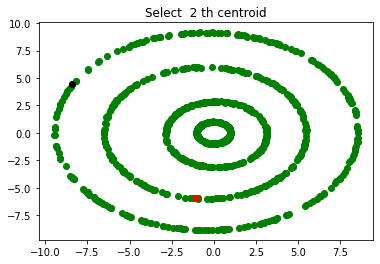

In [150]:
centroids = initialize_kmeans_plus(X, k = 2)

# K = 3

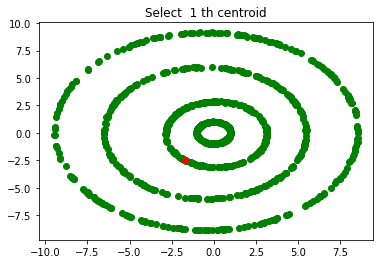

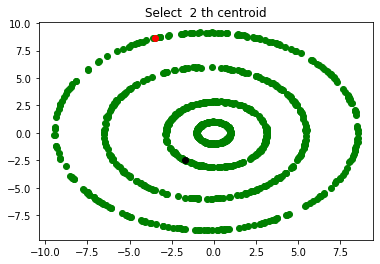

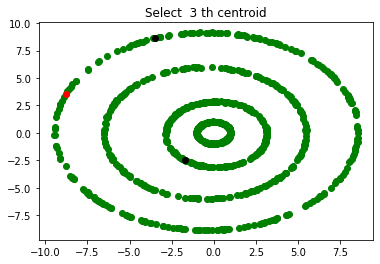

In [151]:
centroids = initialize_kmeans_plus(X, k = 3)

# K = 4

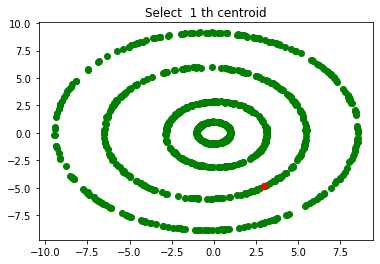

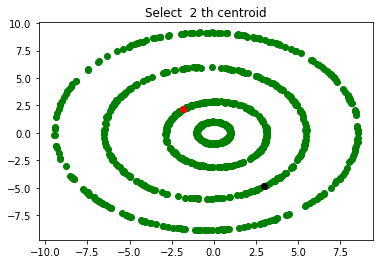

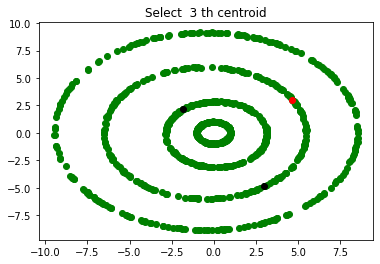

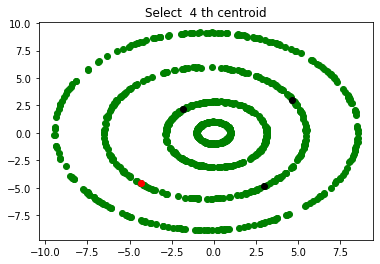

In [152]:
centroids = initialize_kmeans_plus(X, k = 4)

# K = 5

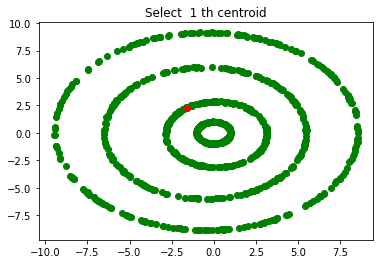

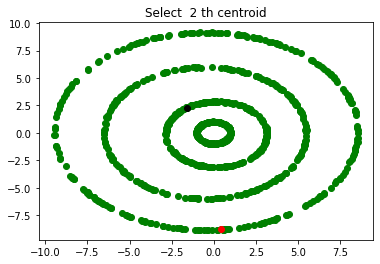

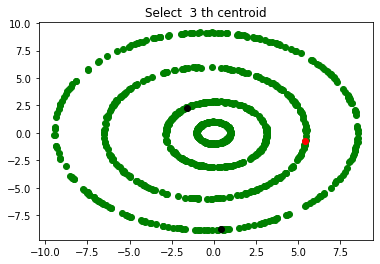

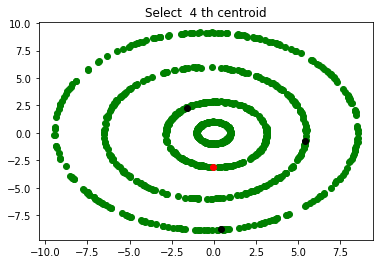

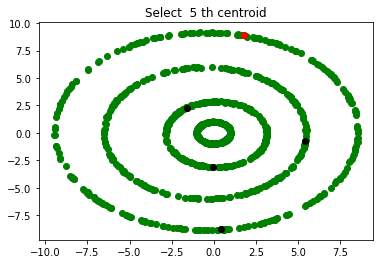

In [153]:
centroids = initialize_kmeans_plus(X, k = 5)

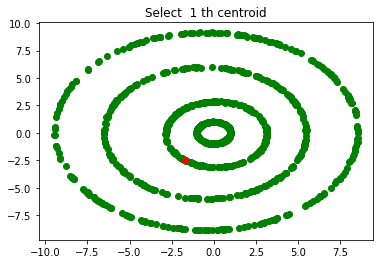

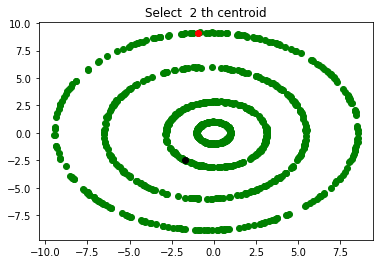

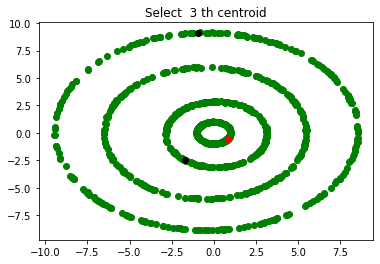

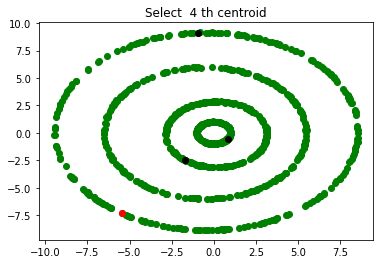

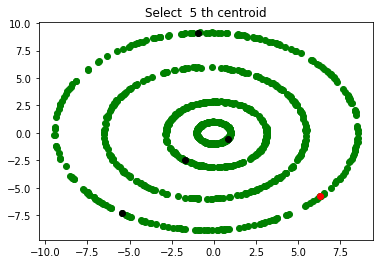

[[-1.64362515  1.19887131]
 [ 0.24133043 -2.22384632]
 [ 0.39999738  1.25119752]
 [ 0.80978232  1.0644    ]
 [-1.33937991  1.41833943]]
[[-0.75151058  1.1358445 ]
 [ 0.31307909  0.13378353]
 [-0.0202104  -0.05234826]
 [ 0.8478839  -0.18061667]
 [-0.04222537  0.3923788 ]]
[[-0.42725133  0.5937339 ]
 [ 0.53821208  0.11753779]
 [-0.11646258 -0.1874517 ]
 [ 0.21221217 -0.0626455 ]
 [ 0.15182028  0.27105066]]
[[-0.27046077  0.37949222]
 [ 0.63658081 -0.17115606]
 [-0.26063487 -0.21993705]
 [ 0.12638995 -0.00652117]
 [ 0.19016407  0.3405122 ]]
[[-0.29050183  0.32215569]
 [ 0.31880047 -0.15612329]
 [-0.26147047 -0.1594505 ]
 [ 0.02893934  0.01145489]
 [ 0.14425278  0.3689981 ]]
[[-0.22465764  0.29715019]
 [ 0.21319136 -0.13343891]
 [-0.16114279 -0.07763413]
 [ 0.0704309   0.01997299]
 [ 0.04469641  0.22701784]]
[[-0.25154583  0.15014852]
 [ 0.16094321 -0.09646096]
 [-0.12768364 -0.00734078]
 [ 0.          0.        ]
 [-0.02582051  0.10899515]]
[[-0.39092564  0.26153395]
 [ 0.14636149 -0.0834

In [154]:
n_iter = 1000
centroids = initialize_kmeans_plus(X, k = 5)
for it in range(n_iter):
    clusters = cluster_assignment(X, centroids,n_clusters)
    previous_centroids = centroids.copy()
    centroids = update_centroids(X, clusters,n_clusters)
    diff = centroids - previous_centroids
    print(diff)
    if not diff.any():
        print("K-Means Converged")
        break

Voronoi Plot associated to 5 cluster center


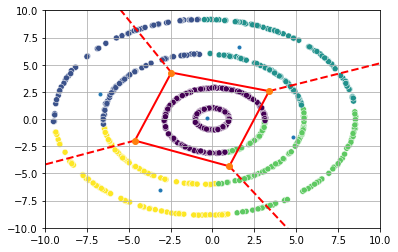

In [155]:
print("Voronoi Plot associated to "+ str(n_clusters) +" cluster center")
vor = Voronoi(centroids)
voronoi_plot_2d(vor,line_colors = 'red',line_width=2,show_points = True)
plt.grid()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
sb.scatterplot(x=X[:, 0], y =X[:, 1], c=y_pred)
plt.show()
